In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/symptom2disease/Symptom2Disease.csv


In [2]:
df=pd.read_csv('/kaggle/input/symptom2disease/Symptom2Disease.csv',header=0,names=['label','text'])

In [3]:
df.head(10)
df.shape
#print(df.iloc[:,0])

(1200, 2)

In [4]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [5]:
df['label']=df['label'].fillna(' ')
df['text']=df['text'].fillna(' ')

In [6]:
import re
import string
def remove_punc(text):
    punc=(string.punctuation)
#     print(punc) # !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
    ans = text.translate(str.maketrans('', '', punc))
    return ans


In [7]:
df['text']=df['text'].apply(remove_punc)
df['text']=df['text'].str.lower()
df['text']

0      i have been experiencing a skin rash on my arm...
1      my skin has been peeling especially on my knee...
2      i have been experiencing joint pain in my fing...
3      there is a silver like dusting on my skin espe...
4      my nails have small dents or pits in them and ...
                             ...                        
295    im shaking and trembling all over ive lost my ...
296    particularly in the crevices of my skin i have...
297    i regularly experience these intense urges and...
298    i have trouble breathing especially outside i ...
299    i constantly sneeze and have a dry cough my in...
Name: text, Length: 1200, dtype: object

In [8]:
from nltk.corpus import stopwords
def remove_stopwords(text):
    temp=stopwords.words('english')
    new_text=[]
    for word in text.split():
        if word in temp:
            new_text.append('')
        else:
            new_text.append(word)
    x=new_text[:]
    #print(x)
    new_text.clear()
    return ' '.join(x)
df['text']=df['text'].apply(remove_stopwords)

In [9]:
from nltk.tokenize import word_tokenize,sent_tokenize
df['text']=df['text'].map(lambda x: word_tokenize(x))

In [10]:
text=df['text'].tolist()


In [11]:
from gensim.models import Word2Vec
model=Word2Vec(sentences=text,min_count=5,vector_size=100,window=10,sg=1)


In [12]:
model.wv.most_similar('cold')

[('pounding', 0.9919207692146301),
 ('beating', 0.9906245470046997),
 ('fast', 0.9891361594200134),
 ('chilly', 0.9879224300384521),
 ('catch', 0.9877020716667175),
 ('mucous', 0.981188178062439),
 ('away', 0.9791079759597778),
 ('aches', 0.9781376719474792),
 ('wont', 0.9777553677558899),
 ('breathe', 0.9747432470321655)]

In [13]:
model.wv.similarity('cold','cough')

0.9270393

In [14]:
#to ccreate a data frame using word2vec were columns represents dimensonality
vocab=model.wv.index_to_key
new_df=pd.DataFrame(model.wv.vectors,index=vocab)
new_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
ive,-0.272201,0.087531,0.324802,0.081753,0.018659,-0.204038,-0.114618,0.267643,-0.099066,-0.130223,...,0.445006,-0.044510,-0.029979,-0.200946,0.239317,0.180466,0.093169,-0.274801,0.255289,-0.117310
also,-0.303081,0.049398,0.315144,0.112512,-0.093858,0.001911,-0.090159,0.373028,-0.137773,-0.113235,...,0.342126,-0.120149,0.058996,-0.174617,0.155111,0.208613,-0.017619,-0.162016,0.307496,-0.069764
skin,-0.369765,0.072629,0.449794,0.278232,-0.247325,0.313669,0.003681,0.634091,-0.166825,-0.019338,...,0.279112,-0.159782,0.294544,-0.152296,0.240836,0.331277,-0.146151,-0.006448,0.424368,-0.064738
lot,-0.269967,0.031771,0.436489,0.017675,0.062688,-0.135007,-0.156063,0.314621,-0.133195,-0.139218,...,0.423086,-0.022955,0.026316,-0.171832,0.244354,0.203719,0.068702,-0.171458,0.260242,-0.041886
really,-0.417961,0.097959,0.387492,0.059235,0.068269,-0.112169,-0.230219,0.256560,-0.278901,-0.136105,...,0.527708,-0.047613,0.120182,-0.186463,0.225960,0.130185,0.106302,-0.280640,0.398086,-0.029301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
suffer,-0.241252,0.081713,0.034171,0.101259,-0.069004,-0.046937,-0.038286,0.302220,-0.082353,-0.005418,...,0.185436,0.063717,-0.038441,-0.050555,0.222365,0.255986,0.040539,-0.161981,0.170141,-0.098461
excessively,-0.264949,0.046773,0.145446,0.064084,-0.081488,-0.094405,-0.086087,0.356724,-0.050838,-0.035569,...,0.289995,0.004439,-0.070748,-0.111314,0.215717,0.278658,0.052127,-0.189339,0.208737,-0.141752
seeing,-0.201335,0.063042,0.040382,0.090988,-0.049730,-0.051676,-0.055593,0.256631,-0.075949,-0.005861,...,0.183125,0.052828,-0.039062,-0.046532,0.220553,0.227676,0.058840,-0.144409,0.147171,-0.101846
worrying,-0.257980,0.064575,0.104076,0.070815,-0.063689,-0.019535,-0.065165,0.313899,-0.059179,-0.008002,...,0.211570,0.014710,-0.001582,-0.061000,0.197259,0.244519,0.039539,-0.128131,0.177314,-0.077644


In [15]:
print(type(model.wv.vectors[0]))

<class 'numpy.ndarray'>


In [16]:
y = model.wv.index_to_key

In [17]:
#using tsne to visualize 300 dimensolaity
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,n_iter=5000,perplexity=30,random_state=0)
vectors = np.asarray(model.wv.vectors)
labels = np.asarray(model.wv.index_to_key)
vectors=tsne.fit_transform(vectors)
x_vals = [v[0] for v in vectors]
y_vals = [v[1] for v in vectors]

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [18]:
import plotly.graph_objs as go
fig = go.Figure()
trace = go.Scatter(x=x_vals, y=y_vals, mode='markers', text=labels)
fig.add_trace(trace)
fig.update_layout(title="Word2Vec - Visualizzazione embedding con TSNE")
fig.show()

In [19]:
def sent_vect(sent):
    size=model.wv.vector_size
    wv_res=np.zeros(size)
    ctr=1
    for w in sent:
        if w in model.wv:
            ctr+=1
            wv_res+=model.wv[w]
    wv_res=wv_res/ctr
    return wv_res

In [20]:
df['sent_vect']=df['text'].apply(sent_vect)

In [21]:
temp=list(enumerate(df['label'].unique()))
label={}
for i,j in temp:
    label[j]=i
label

{'Psoriasis': 0,
 'Varicose Veins': 1,
 'Typhoid': 2,
 'Chicken pox': 3,
 'Impetigo': 4,
 'Dengue': 5,
 'Fungal infection': 6,
 'Common Cold': 7,
 'Pneumonia': 8,
 'Dimorphic Hemorrhoids': 9,
 'Arthritis': 10,
 'Acne': 11,
 'Bronchial Asthma': 12,
 'Hypertension': 13,
 'Migraine': 14,
 'Cervical spondylosis': 15,
 'Jaundice': 16,
 'Malaria': 17,
 'urinary tract infection': 18,
 'allergy': 19,
 'gastroesophageal reflux disease': 20,
 'drug reaction': 21,
 'peptic ulcer disease': 22,
 'diabetes': 23}

In [22]:
def labelling(disease):
    return label[disease]
df['label_num']=df['label'].apply(labelling)

In [23]:
df['label_num']=df['label_num'].astype('object')
df.dtypes

label        object
text         object
sent_vect    object
label_num    object
dtype: object

In [24]:
x=df['sent_vect']
y=df['label_num']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(960,) (240,) (960,) (240,)


In [25]:
from sklearn.naive_bayes import GaussianNB
obj=GaussianNB()
x_train=x_train.to_list()
y_train=y_train.to_list()

In [26]:
obj.fit(x_train,y_train)

GaussianNB()

In [27]:
from sklearn import metrics
x_test=x_test.to_list()
y_test=y_test.to_list()
predicted=obj.predict(x_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



<Figure size 3000x3000 with 0 Axes>

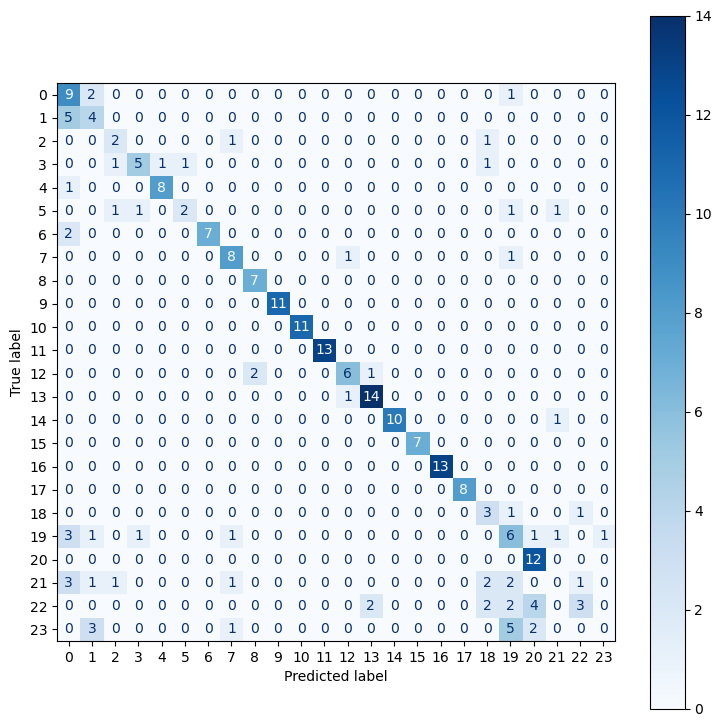

In [28]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(30,30))
disp=metrics.plot_confusion_matrix(obj,x_test,y_test,cmap=plt.cm.Blues)
fig = disp.ax_.get_figure() 
fig.set_figwidth(9)
fig.set_figheight(9)  

In [29]:
print('accuraccy:',metrics.accuracy_score(y_test,predicted))
print('recall:',metrics.recall_score(y_test,predicted,average='micro'))
print('precision:',metrics.precision_score(y_test,predicted,average='micro'))


accuraccy: 0.7041666666666667
recall: 0.7041666666666667
precision: 0.7041666666666667
